In [1]:
###Build the graph

from igraph import *

In [2]:
n_vertices=3264

In [3]:
#Create graph
g=Graph()

In [4]:
#Add vertices
g.add_vertices(n_vertices)

In [6]:
edges=[]
weights=[]

with open('citeseer.edges','r') as edges_file:
    line=edges_file.readline()
    while line !='':
        strings=line.rstrip().split(',')

        ##add edge to edge list
        edges.append(((int(strings[0])-1),(int(strings[1])-1)))

        ## add weight to weight list
        weights.append(float(strings[2]))
        line=edges_file.readline()

#add edges to the graph
g.add_edges(edges)

#add weights to edges in the graph
g.es['weight']=weights

In [7]:
###Visualise the graph

out_fig_name='graph.eps'
visual_style={}

#define colors used for outdegree visualization
colours=['#fecc5c', '#a31a1c']

#set bbox and margin
visual_style['bbox']=(3000,3000)
visual_style['margin']=17

#set vertex colours
visual_style['vertex_color']='orange'

#set vertex size
visual_style['vertex_size']=20

#set vertex label size
visual_style['vertex_label size']=10

#don't curve the edges
visual_style['edge_curved']=False

#set the layout
my_layout=g.layout_fruchterman_reingold()
visual_style['layout']=my_layout

#plot the graph
plot(g,out_fig_name, **visual_style)

In [9]:
###Visualise the graph according to labels

n_classes=6
bins=[[] for x in range(n_classes)]
with open('citeseer.node_labels','r') as labels_files:
    line=labels_files.readline()
    while line !='':
        string=line.rstrip().split(',')
        vertex_id=int(string[0])-1
        bin_id=int(string[1])-1
        bins[bin_id].append(vertex_id)
        line=labels_files.readline()

In [13]:
node_colours=[]
for i in range(n_vertices):
    if i in bins[0]:
        node_colours.append('red')
    elif i in bins[1]:
        node_colours.append('orange')
    elif i in bins[2]:
        node_colours.append('pink')
    elif i in bins[3]:
        node_colours.append('purple')
    elif i in bins[4]:
        node_colours.append('blue')
    elif i in bins[5]:
        node_colours.append('green')
out_fig_name='labelled_graph.eps'
g.vs['color']=node_colours
visual_style={}

#define colors used for outdegree visualization
colours=['#fecc5c', '#a31a1c']

#set bbox and margin
visual_style['bbox']=(3000,3000)
visual_style['margin']=17

#set vertex size
visual_style['vertex_size']=20

#set vertex label size
visual_style['vertex_label size']=10

#don't curve the edges
visual_style['edge_curved']=False

#set the layout
visual_style['layout']=my_layout

#plot the graph
plot(g,out_fig_name, **visual_style)

In [14]:
###Analyze the graph

print('number of vertices:', g.vcount())
print('number of edges:',g.ecount())
print('density of the graph',2*g.ecount()/(g.vcount()*(g.vcount()-1)))

number of vertices: 3264
number of edges: 4536
density of the graph 0.000851796434172811


In [16]:
degrees=[]
total=0

for n in range(n_vertices):
    neighbors=g.neighbors(n,mode='ALL')
    total+=len(neighbors)
    degrees.append(len(neighbors))
print('average degree:',total/n_vertices)
print('max degree:',max(degrees))
print('vertex ID with the mas degree:',degrees.index(max(degrees)))


average degree: 2.7794117647058822
max degree: 99
vertex ID with the mas degree: 2906


In [17]:
import matplotlib.pyplot as plt 
import numpy as np 
plt.rcParams.update({'font.size':25})
x=[x for x in range(max(degrees)+1)]
degree_counts=[0 for x in range(100)]

for i in degrees:
    degree_counts[i]+=1

print('degree having the max number of vertices:',degree_counts.index(max(degree_counts)))
print('number of vertices having the most abundant degree:',max(degree_counts))

degree having the max number of vertices: 1
number of vertices having the most abundant degree: 1321


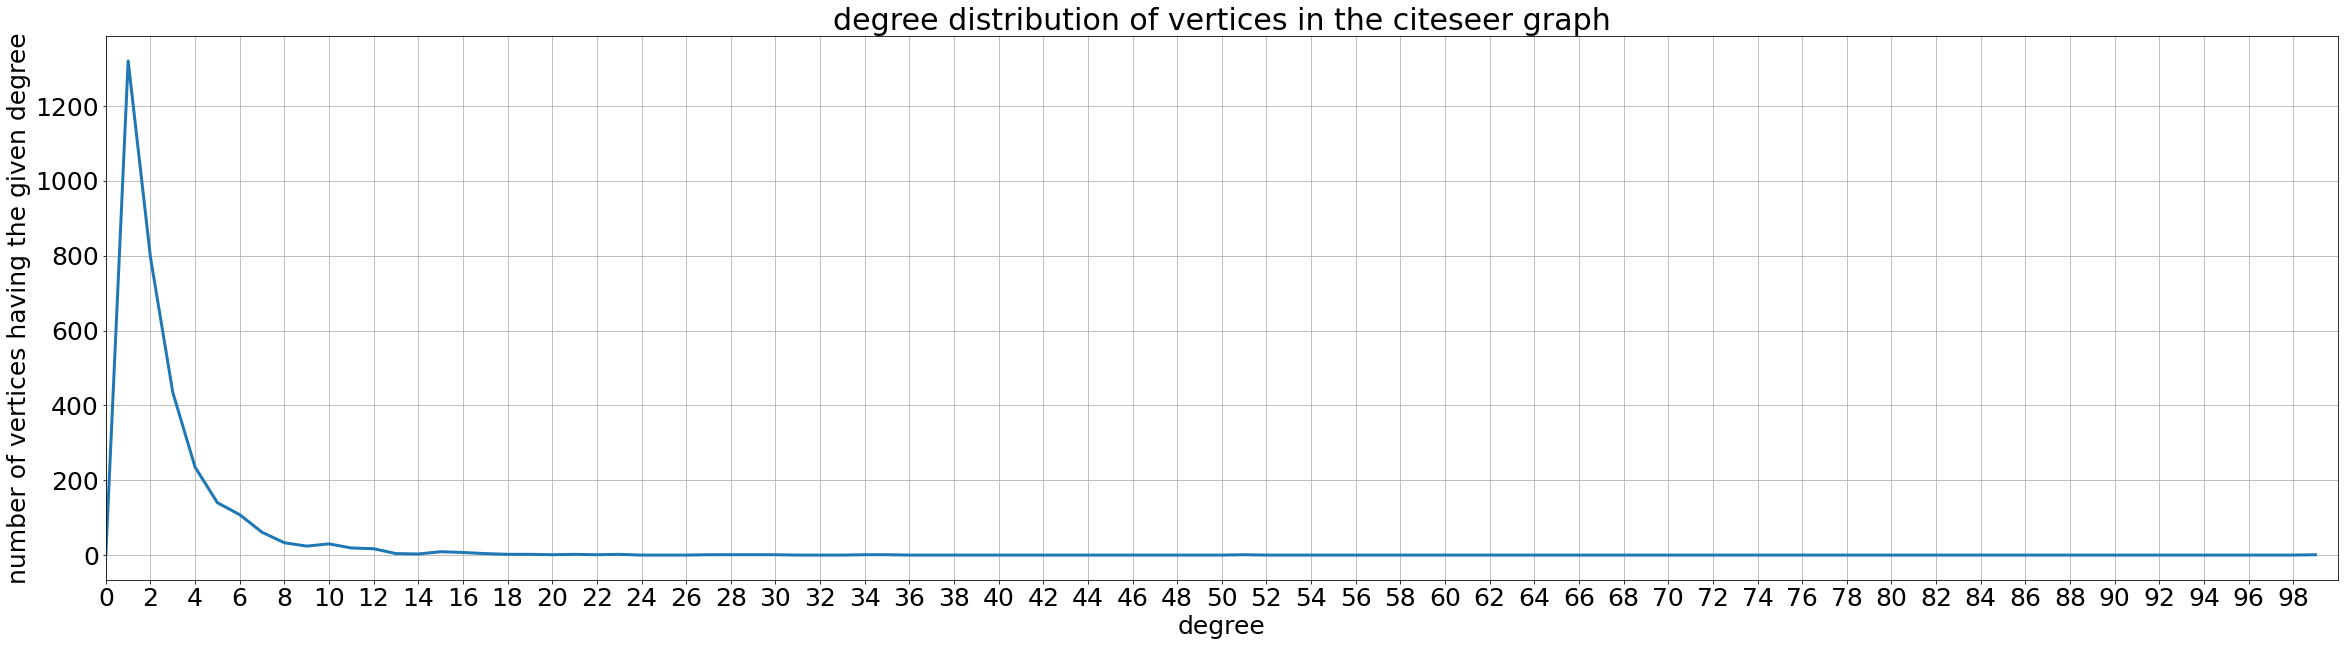

In [19]:
plt.figure(figsize=(40,10))
plt.plot(x,degree_counts,linewidth=3.0)
plt.ylabel('number of vertices having the given degree')
plt.xlabel('degree')
plt.title('degree distribution of vertices in the citeseer graph')
plt.xlim(0,100)
plt.xticks(np.arange(min(x),max(x)+1,2.0))
plt.grid(True)
plt.show()

In [21]:
cliques=g.cliques(min=3,max=3)
triangle_count=[0]*g.vcount()
for i,j,k in cliques:
    triangle_count[i]+=1
    triangle_count[j]+=1
    triangle_count[k]+=1

print('average number of triangles:',sum(triangle_count)/g.vcount())
print('max number of triangles:',max(triangle_count))
print('vertex ID with the max number of triangles:',triangle_count.index(max(triangle_count)))

average number of triangles: 1.0716911764705883
max number of triangles: 85
vertex ID with the max number of triangles: 2906


In [23]:
print('diameter of the graph:',g.diameter())

diameter of the graph: 28


In [26]:
def assortativity(graph, degrees=None):
    if degrees is None:degrees=graph.degree()
    degree_sq=[deg**2 for deg in degrees]
    m=float(graph.ecount())
    num1,num2,num3=0,0,0
    for source, target in graph.get_edgelist():
        num1+=degrees[source]*degrees[target]
        num2+=degrees[source]+degrees[target]
        num3+=degree_sq[source]+degree_sq[target]

    num1/=m
    num3/=2*m
    num2=(num2/num3)**2

    return (num1-num2)/(num3-num2)
print('assortativity of the graph:',assortativity(g))

assortativity of the graph: 1.0011277194863288
